In [1]:
import numpy as np
import random
import math
from matplotlib import pyplot as py
%load_ext watermark

random.seed(1234)

In [2]:
%watermark

Last updated: 2024-03-23T20:52:47.647275-04:00

Python implementation: CPython
Python version       : 3.12.2
IPython version      : 8.20.0

Compiler    : MSC v.1916 64 bit (AMD64)
OS          : Windows
Release     : 11
Machine     : AMD64
Processor   : Intel64 Family 6 Model 141 Stepping 1, GenuineIntel
CPU cores   : 12
Architecture: 64bit



In [450]:
%watermark --iversions

numpy     : 1.26.4
matplotlib: 3.8.0
scipy     : 1.11.3



# This notebook contains python implementatations of the code in The Scientist and Engineer's Guide to Digital Signal Processing" by By Steven W. Smith, Ph.D. The code is an almost exact translation of the BASIC code into Python, which will result in bad/low-performance/ugly python code (e.g. looping everything).  I've purposefully left out all sort of nice python features (e.g. enumerate) to match the original code closely.

# I've tried to avoid using numpy or scipy because the goal of the example code is to show and explain how some of these DSP functions are actually implemented.  In any non-academic setting it would be more pragmatic to use a numpy array and not a python list, but I think it's easier to stick to the spirit of the original BASIC code using standard python data structures and functions.

# Chapter 2

## 2-1 Calculate Mean and Standard Deviation

In [107]:
n = 512
#Generate random integers
x = [random.randint(0,3) for i in range(n)]

mean=0
for i in range(512):
    mean = mean + x[i]
mean = mean/n

variance = 0
for i in range(512):
    variance = variance + (x[i] - mean)**2
sd = math.sqrt(variance/(n-1))
print(f'Mean:{round(mean,2)},Standard Deviation:{round(sd,2)}')

Mean:1.54,Standard Deviation:1.11


## 2-2 Calculate Running Mean and Standard Deviation

In [109]:
#Generate random integers
x = [random.randint(0,3) for i in range(10)]
n= 0               
total = 0 #Sum is a python function, so we cannot use it as a variable name
sum_squares = 0

#Since this is a "running" or streaming calcualation, the loop simulates values arriving one after another, and then the statistics are calculated for every new value
for i in range(len(x)):
    n = n+1         
    total = total + x[i]
    sum_squares = sum_squares + x[i]**2
    mean = total/n
    #I needed to add this if statement because when n is 1, the denominator for the variance calcualation is zero. This is listed as errata on the book website. 
    if n > 1:
        variance = (sum_squares - total**2/n) / (n-1)
    else:
        variance = (sum_squares - total**2/n) / (n)
    sd = math.sqrt(variance)
    print(f'Mean:{round(mean,2)},Standard Deviation:{round(sd,2)}')

Mean:3.0,Standard Deviation:0.0
Mean:1.5,Standard Deviation:2.12
Mean:1.67,Standard Deviation:1.53
Mean:1.5,Standard Deviation:1.29
Mean:1.8,Standard Deviation:1.3
Mean:2.0,Standard Deviation:1.26
Mean:1.86,Standard Deviation:1.21
Mean:1.88,Standard Deviation:1.13
Mean:1.78,Standard Deviation:1.09
Mean:1.9,Standard Deviation:1.1


## 2-3 Calculate the Histogram, mean, and standard deviations

In [111]:
n = 25001
#Generate random integers
x = [random.randint(0,254) for i in range(n)]

#Initialise list of histogram values
h = []
for i in range(255):
    h.append(0)

#Calculate Histogram
for i in range(len(x)):
    h[x[i]] = h[x[i]] + 1

mean = 0
for i in range(len(h)):
    mean = mean + i * h[i]
mean = mean / n

variance = 0
for i in range(len(h)):
    variance = variance + h[i] * (i - mean)**2
variance = variance / (n-1)
sd = math.sqrt(variance)
print(f'Mean:{round(mean,2)},Standard Deviation:{round(sd,2)}')

Mean:127.69,Standard Deviation:73.95


## 2-4 Calculating the Binned Histogram

In [113]:
n = 25000
#Generate random integers
x = [random.random()*10 for i in range(n)]

#Initialise list of histogram values.  Note that the length of the array is 1000 since so that position 999 exists.
h = []
for i in range(1000):
    h.append(0)

for i in range(n):
    bin_num = int(x[i] * 100) #Multipled by 100 instead of the .01 in the book.  This is listed as errata on the book website. 
    h[bin_num] = h[bin_num]+1

# Chapter 6

## 6-1 Convolution using the input side algorithm

In [115]:
x = [random.randint(0,3) for i in range(80)]
h = [random.randint(0,3) for i in range(30)]

y = []
for i in range(110):
    y.append(0)

for i in range(len(x)):
    for j in range(len(h)):
        y[i+j] = y[i+j] + x[i]*h[j]
print(y)

[1, 3, 4, 3, 2, 5, 8, 11, 15, 19, 18, 17, 24, 28, 29, 32, 37, 35, 44, 39, 42, 44, 37, 40, 41, 43, 50, 34, 55, 41, 41, 45, 35, 34, 44, 55, 52, 53, 46, 37, 41, 37, 38, 34, 47, 40, 37, 58, 45, 30, 43, 34, 39, 36, 44, 49, 55, 39, 39, 36, 53, 37, 37, 46, 57, 42, 47, 47, 37, 44, 57, 51, 51, 52, 51, 45, 53, 42, 39, 54, 53, 37, 56, 50, 51, 44, 42, 30, 46, 38, 24, 24, 41, 34, 31, 20, 22, 22, 20, 4, 6, 14, 14, 6, 3, 9, 15, 12, 6, 0]


## 6-2 Convolution using the output side algorithm

In [117]:
x = [random.randint(0,3) for i in range(80)]
h = [random.randint(0,3) for i in range(30)]

y = []
for i in range(110):
    y.append(0)
    for j in range(len(h)):
        #Python doesn't have a goto statement (for good reason!), so it doesn't make sense to try to recreate the original logic using if and go statements. 
        if ((i - j) >= 0) & ((i - j) < len(x)):
            y[i] = y[i] + h[j] * x[i-j]
print(y)

[0, 0, 3, 2, 8, 14, 14, 18, 11, 21, 26, 20, 24, 26, 32, 31, 32, 34, 39, 46, 48, 57, 58, 53, 69, 64, 58, 77, 70, 64, 71, 68, 64, 73, 69, 67, 74, 71, 53, 58, 74, 58, 60, 70, 58, 51, 56, 53, 53, 56, 55, 61, 45, 43, 40, 51, 47, 53, 53, 57, 46, 58, 50, 67, 67, 69, 72, 76, 58, 67, 66, 78, 71, 79, 82, 74, 68, 86, 75, 88, 87, 80, 70, 74, 59, 67, 57, 67, 54, 65, 57, 53, 42, 50, 39, 41, 35, 40, 30, 27, 28, 22, 19, 23, 20, 13, 13, 5, 3, 0]


# Chapter 8

# 8-1 Inverse Discrete Fourier Transform

In [552]:
#Create a signal with the real and imaginary components.  
freq = 5
rex = [0] * 512
imx = [0] * 512
rex[freq] = 100
imx[freq] = 10

#8-1 Code
pi = 3.14159265

for k in range(len(rex)):
    rex[k] = rex[k] / len(rex)
    imx[k] = -imx[k] / len(imx)

xx = []
for i in range(512):
    xx.append(0)

for k in range(len(rex)):
    for i in range(len(xx)):
        xx[i] = xx[i] + rex[k] * math.cos(2*pi*k*(i/len(xx)))
        xx[i] = xx[i] + imx[k] * math.sin(2*pi*k*(i/len(xx)))

#Using the alternate Code 
xx_alt = []
for i in range(512):
    xx_alt.append(0)

for i in range(len(xx_alt)):
    for k in range(len(rex)):
        xx_alt[i] = xx_alt[i] + rex[k] * math.cos(2*pi*k*(i/len(xx_alt)))
        xx_alt[i] = xx_alt[i] + imx[k] * math.sin(2*pi*k*(i/len(xx_alt)))


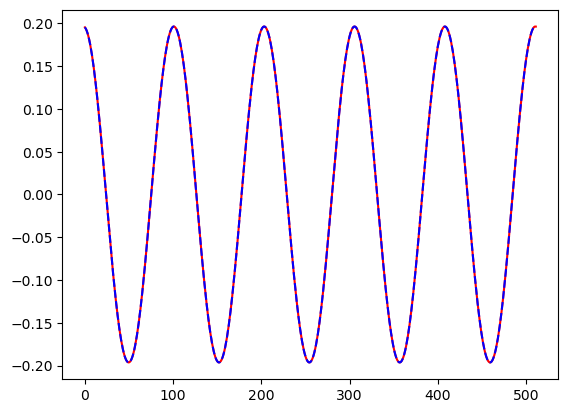

In [553]:
#The Number of postiive peaks in this plot should match the value in the freq variable.
#There are two lines in this plot, red is the first method in 8-1, and blue is the alternate.
py.plot(range(len(xx)), xx, 'r',range(len(xx_alt)), xx_alt, 'b--')
plt.show()

# 8-2 Discrete Fourier Transform

In [554]:
#Generate a simple sine wave to test the DFT.
sr = 512 # sampling rate
#Assume we have 1 second of signal
t = np.arange(0,1,1.0/sr)
freq = 10  #frequency 
xx = np.sin(2*np.pi*freq*t)

#8-2 Code starts here
rex = []
imx = []
for i in range(256):
    rex.append(0)
    imx.append(0)

for k in range(len(rex)):
    for i in range(len(xx)):
        rex[k] = rex[k] + xx[i] * math.cos(2*pi*k*(i/len(xx)))
        imx[k] = imx[k] - xx[i] * math.sin(2*pi*k*(i/len(xx)))
print (f'Highest Real Amplitude Frequency after FFT (the value shown here should match the freq variable value): {np.argmax(np.abs(rex))}')
print (f'Highest Imaginary Amplitude Frequency after FFT (the value shown here should match the freq variable value): {np.argmax(np.abs(imx))}')

Highest Real Amplitude Frequency after FFT (the value shown here should match the freq variable value): 10
Highest Imaginary Amplitude Frequency after FFT (the value shown here should match the freq variable value): 10


# 8-3 Rectangular to Polar and Polar to Rectangular Conversion

In [615]:
#Create a signal with the real and imaginary components.  
freq = 5
rex = [0] * 256
imx = [0] * 256
rex[freq] = 2
imx[freq] = 1

#8-3 Code Stars Here
mag = [0] * 256 #This isn't done in the original code, but we need to intialize to length of the array to index it later.
phase = [0] * 256 #This isn't done in the original code, but we need to intialize to length of the array to index it later.
pi = 3.14159265

for k in range(len(rex)):
    mag[k] = math.sqrt(rex[k]**2 + imx[k]**2)
    if rex[k] == 0:
        rex[k] = 1e-20
    phase[k] = math.atan(imx[k] / rex[k])

#Instead of overwriting the original rex and imx variables, let's just create new ones so we can compare the original conversion to polar and back to recangular
rex_conv = [0] * 256
imx_conv = [0] * 256
for i in range(len(rex_conv)):
    rex_conv[i] = mag[i] * math.cos(phase[i])
    imx_conv[i] = mag[i] *  math.sin(phase[i])

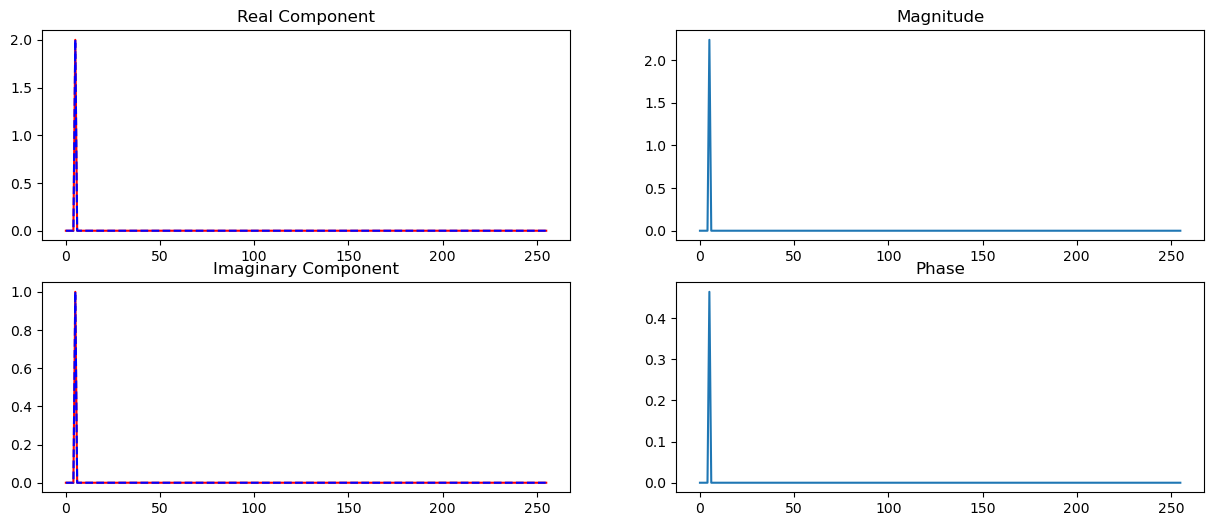

In [622]:
fig,ax = plt.subplots(2,2)
fig.set_size_inches(15,6)
ax[0,0].plot(range(len(rex)),rex, 'r', range(len(rex_conv)), rex_conv, 'b--')
ax[0,0].set_title('Real Component')
ax[0,1].plot(range(len(mag)),mag)
ax[0,1].set_title('Magnitude')
ax[1,0].plot(range(len(imx)),imx, 'r', range(len(imx_conv)), imx_conv, 'b--')
ax[1,0].set_title('Imaginary Component')
ax[1,1].plot(range(len(phase)),phase)
ax[1,1].set_title('Phase')
plt.show()

# 8-4 Phase Unwrapping

In [757]:
pi = 3.14159265
#Create sample data with a jagged appearance similar to figure 8-12 in the textbook
phase = np.concatenate([np.linspace(pi,-pi,64)]*4)
uwphase = [0] * 256

#uwphase[0] = 0.  This is in the original BASIC code, but it's not needed since the entire list is initialized to 0.  

for k in range(0, len(phase)):
    #CINT does slightly different things in different implementations of BASIC, but it seems like the reason the original code used it is to round the value to an integer. 
    c = round((uwphase[k-1] - phase[k]) / (2 * pi))
    uwphase[k] = phase[k] + c*2*pi

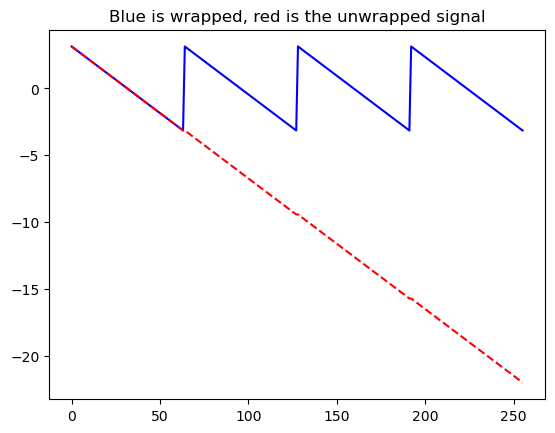

In [769]:
py.plot(range(256), phase, 'b', range(256), uwphase,'r--',)
plt.title('Blue is wrapped, red is the unwrapped signal')
plt.show()

# Chapter 12

# 12-1 Negative Frequency Generation

In [65]:
rex = [0,1,2,3,4,5,6,7,0,0,0,0,0,0,0,0]
imx = [0] * 16

n = len(rex)
#In the book, the loops go from 0 to n-1.  Keep in mind that the range function generates the values from 0 to n-1, so we can use n here instead of the n-1 used in the book
for k in range(n//2+1, n):
    rex[k] =  rex[n-k]
    imx[k] =  rex[n-k]
print(rex)
print(imx)

[0, 1, 2, 3, 4, 5, 6, 7, 0, 7, 6, 5, 4, 3, 2, 1]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 7, 6, 5, 4, 3, 2, 1]


# 12 -2 Complex DFT by Correlation

In [68]:
#Generate a simple sine wave to test the DFT.
srate = 512 # sampling rate
#Assume we have 1 second of signal
t = np.arange(0,1,1.0/srate)
freq = 10 #frequency 
xr = np.sin(2*np.pi*freq*t)
xi = [0] * len(xr)

n = len(xr)

pi = 3.14159265            

rex = []
imx = []

#In the book, the loops go from 0 to n-1.  Keep in mind that the range function generates the values from 0 to n-1, so we can use n here instead of the n-1 used in the book
for k in range(n):          
    rex.append(0)               
    imx.append(0)

for k in range(n):         
    for i in range(n):         
        sr = math.cos(2*pi*k*(i/n))      
        si = -math.sin(2*pi*k*(i/n))
        rex[k] = rex[k] + xr[i]*sr - xi[i]*si
        imx[k] = imx[k] + xr[i]*si + xi[i]*sr
print(f'Max Real Frequency:{np.argmax(np.abs(rex[:n//2]))},Max Imaginary Frequency:{np.argmax(np.abs(imx[:n//2]))}')

Max Real Frequency:10,Max Imaginary Frequency:10


# 12 - 4 The Fast Fourier Transform

In [69]:
TABLE 12-4
1000 'THE FAST FOURIER TRANSFORM
1010 'Upon entry, N% contains the number of points in the DFT, REX[ ] and
1020 'IMX[ ] contain the real and imaginary parts of the input.  Upon return,
1030 'REX[ ] & IMX[ ] contain the DFT output. All signals run from 0 to N%-1.
1040 '
1050 PI = 3.14159265                    'Set constants
1060 NM1% = N%-1
1070 ND2% = N%/2
1080 M% = CINT(LOG(N%)/LOG(2))
1090 J% = ND2%
1100 '
1110 FOR I% = 1 TO N%-2                 'Bit reversal sorting
1120   IF I% >= J% THEN GOTO 1190
1130   TR = REX[J%]
1140   TI = IMX[J%]
1150   REX[J%] = REX[I%]
1160   IMX[J%] = IMX[I%]
1170   REX[I%] = TR
1180   IMX[I%] = TI
1190   K% = ND2%
1200   IF K% > J% THEN GOTO 1240
1210   J% = J%-K%
1220   K% = K%/2
1230   GOTO 1200
1240   J% = J%+K%
1250 NEXT I%
1260 '
1270 FOR L% = 1 TO M%                   'Loop for each stage
1280   LE% = CINT(2^L%)
1290   LE2% = LE%/2
1300   UR = 1
1310   UI = 0
1320   SR =  COS(PI/LE2%)               'Calculate sine & cosine values
1330   SI  = -SIN(PI/LE2%)
1340   FOR J% = 1 TO LE2%               'Loop for each sub DFT
1350     JM1% = J%-1
1360     FOR I% = JM1% TO NM1% STEP LE%     'Loop for each butterfly
1370       IP% = I%+LE2%
1380       TR = REX[IP%]*UR - IMX[IP%]*UI   'Butterfly calculation
1390       TI = REX[IP%]*UI + IMX[IP%]*UR
1400       REX[IP%] = REX[I%]-TR
1410       IMX[IP%] = IMX[I%]-TI
1420       REX[I%]  = REX[I%]+TR
1430       IMX[I%]  = IMX[I%]+TI   
1440     NEXT I%
1450     TR = UR
1460     UR = TR*SR - UI*SI
1470     UI = TR*SI + UI*SR
1480   NEXT J%
1490 NEXT L%
1500 '
1510 RETURN

SyntaxError: unterminated string literal (detected at line 2) (848736024.py, line 2)

In [226]:
#I haven't been able to get this working.  The bitsorting seems to work.  
#But the final frequencies in rex and imx aren't correct. 

#Generate a simple sine wave to test the DFT.
srate = 512 # sampling rate
#Assume we have 1 second of signal
t = np.arange(0,1,1.0/srate)
freq = 10 #frequency 
rex = np.sin(2*np.pi*freq*t)
imx = [0] * len(rex)

mex = np.sin(2*np.pi*freq*t)
#rex = list(range(0,16))
#imx = rex

n = len(rex)


pi = 3.14159265  

nm1 = n - 1
nd2 = int(n/2)

m = round(math.log(n)/math.log(2))
j = nd2

for i in range(1,n-1):
    if i < j:
        tr = rex[j]
        ti = imx[j]
        rex[j] = rex[i]
        imx[j] = imx[i]
        rex[i] = tr
        imx[i] = ti
    k=nd2
    while k <= j:
        j = j-k
        k = k//2
    j = j+k

for l in range(1,m):                   
    le = round(2**l)
    le2  = int(le/2)
    ur = 1
    ui = 0
    sr = math.cos(pi/le2)
    si = -math.sin(pi/le2)
    for j in range(1,le2):
        jm1 = j-1
        for i in range(jm1, nm1, le):
            ip = i + le2
            tr = rex[ip]*ur - imx[ip]*ui
            ti = rex[ip]*ui + imx[ip]*ur
            rex[ip] = rex[i] - tr
            imx[ip] = imx[i] - ti
            rex[i] = rex[i] + tr
            imx[i] = imx[i] + ti
        tr = ur
        ur = tr*sr - ui*si
        ui = tr*si + ui*sr
np.argmax(np.abs(rex[:n//2])),np.argmax(np.abs(imx[:n//2]))

(9, 10)

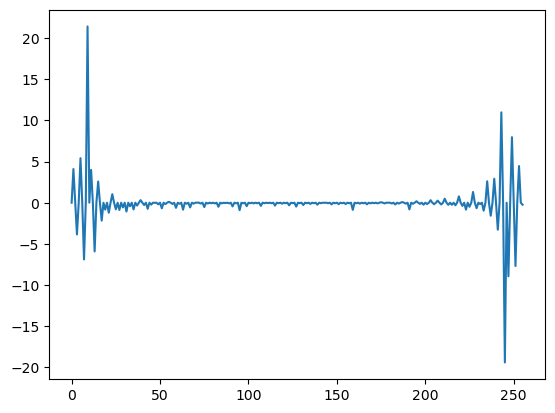

In [227]:
py.plot(range(len(rex[:n//2])), rex[:n//2])

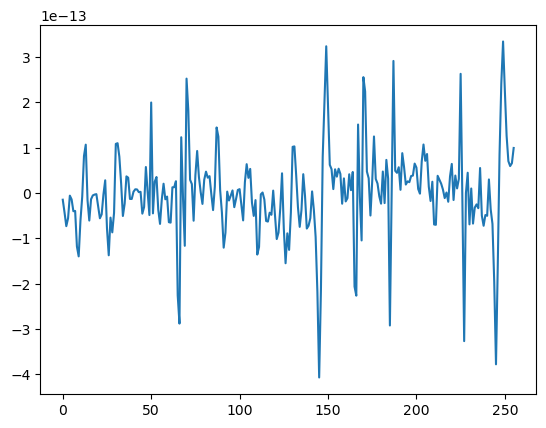

In [223]:
import scipy
n = 512
t = np.arange(0,1,1.0/n)
y_out = scipy.fft.fft(np.sin(2*np.pi*50*t))
py.plot(range(n//2), y_out[:n//2])

In [195]:
np.argmax(np.abs(y_out[:n//2]))

200

# Chapter 15

## 15-1 Moving Average Filter

In [98]:
#Generate Signal
n = 4999
t = np.linspace(0, 1,n)
x = np.sin(2 * np.pi * 2 * t)
x = x + np.random.normal(0,0.3,n)

#15-1 code starts here
y = [0] * n
for i in range(50,n-50):
    y[i] = 0
    for j in range (-50,50):
        y[i] = y[i] + x[i+j]
    y[i] = y[i]/101

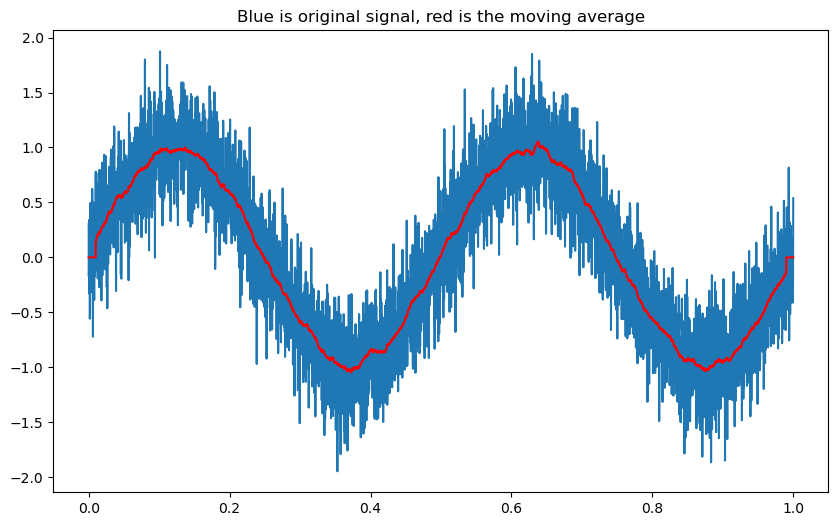

In [99]:
plt.figure(figsize=(10,6))
py.plot(t,x,'C0', t,y,'r')
plt.title('Blue is original signal, red is the moving average')
plt.show()

## Moving Average Filter Using Recursion

In [229]:
#Generate Signal
n = 4999
t = np.linspace(0,1,n)
x = np.sin(2 * np.pi * 3 * t)
x = x + np.random.normal(0,0.3,n)

#15-2 code starts here
y = [0] * n
acc = 0
for i in range(101):
    acc = acc + x[i]
y[50] = acc/101

for i in range(51,4949):
    acc = acc + x[i+50] - x[i-51]
    y[i] = acc/101

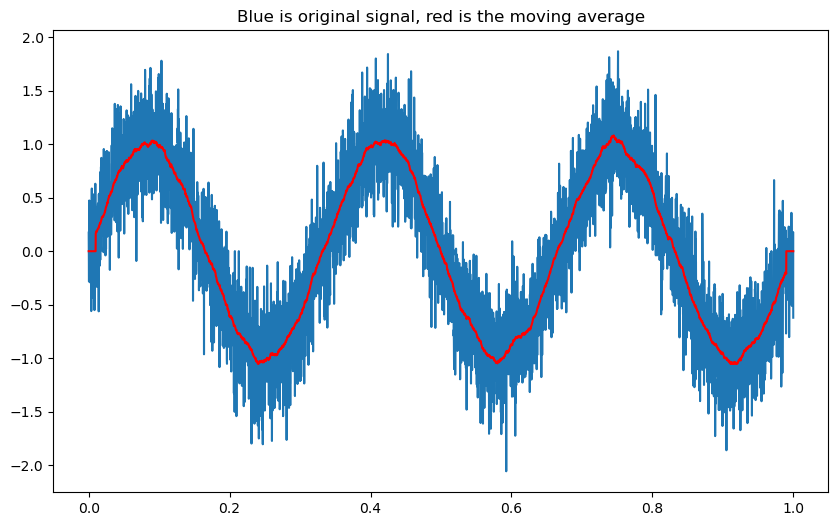

In [230]:
plt.figure(figsize=(10,6))
py.plot(t,x,'C0', t,y,'r')
plt.title('Blue is original signal, red is the moving average')
plt.show()

## Chapter 16